MLG Assignment 2

Tokelo Jr Qhena (578478)
Rotondwa Nemasetoni (578461)
Riziky Joyce (578695)
Chanelle Van Staden (578509)

In [48]:
#importing visualisation libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline , make_pipeline

#importing metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, auc, roc_curve,r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

#importing preprocessing
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#importing regression models
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


In [49]:
startupsdf = pd.read_csv("50_Startups.csv")

In [50]:
startupsdf.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [51]:
startupsdf.shape

(50, 5)

In [52]:
startupsdf.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [53]:
startupsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# Data Cleaning

In [54]:
startupsdf.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [55]:
startupsdf.drop_duplicates(keep='first', inplace=True)

In [56]:
startupsdf.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


## Data Visualization

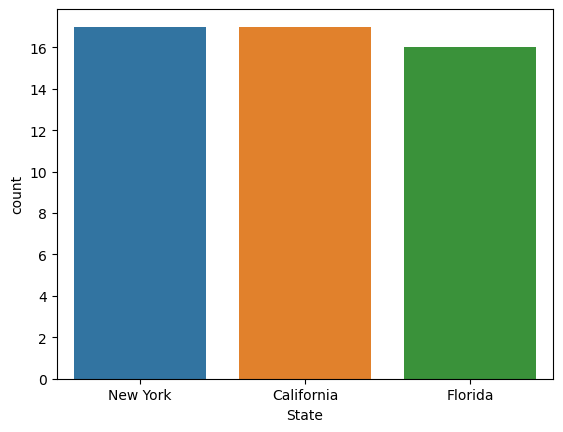

In [57]:
sns.countplot(data=startupsdf, x='State')
plt.show()

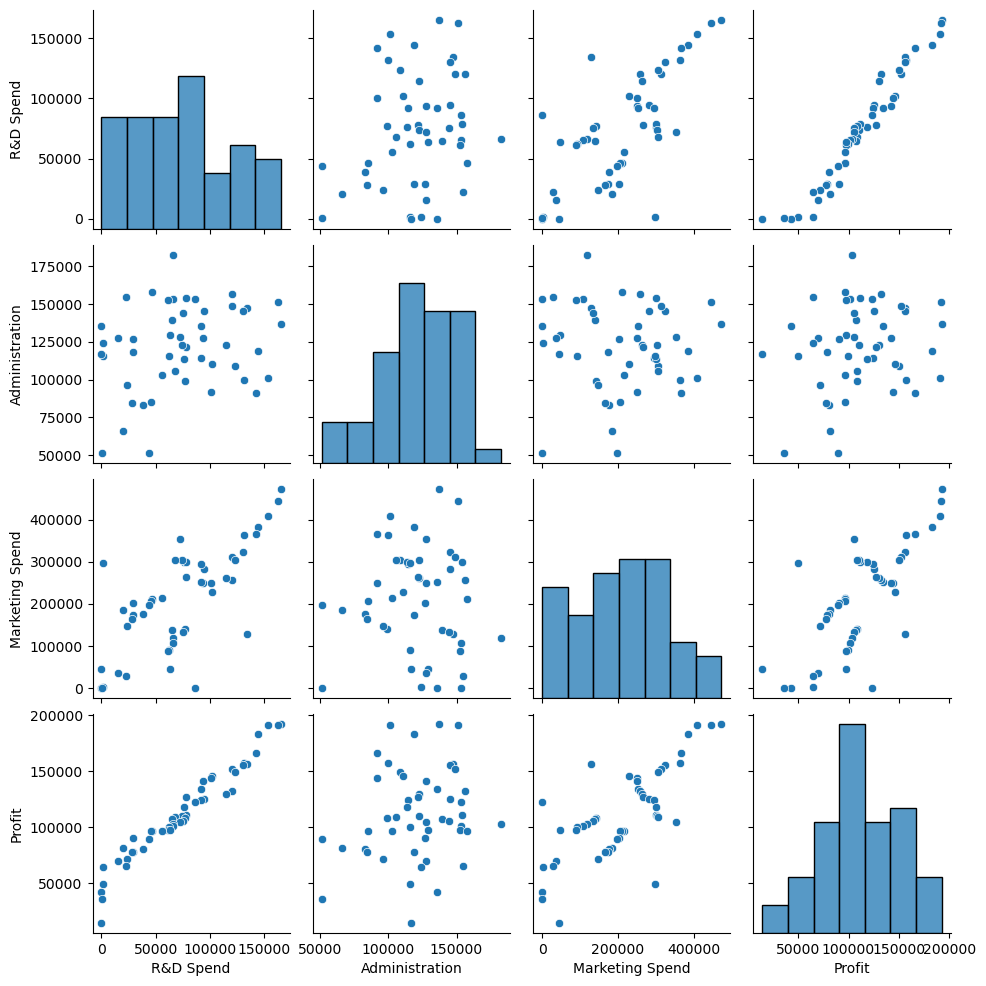

In [58]:
sns.pairplot(startupsdf)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_15100\459756424.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = startupsdf.corr()


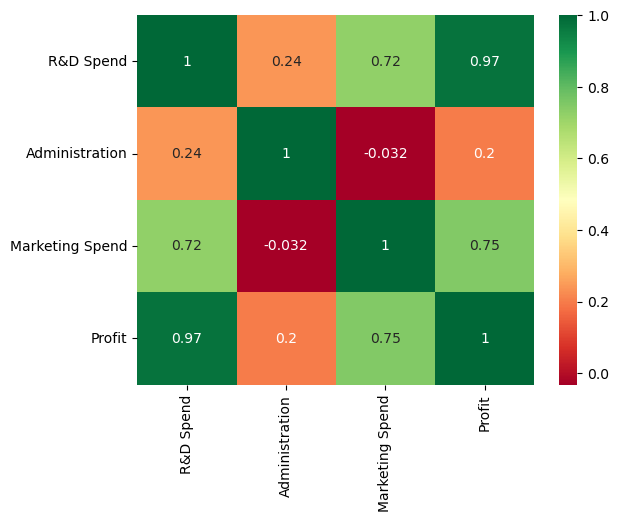

In [59]:
corr = startupsdf.corr()
sns.heatmap(corr, annot=True, cmap = "RdYlGn")
plt.show()

<Axes: >

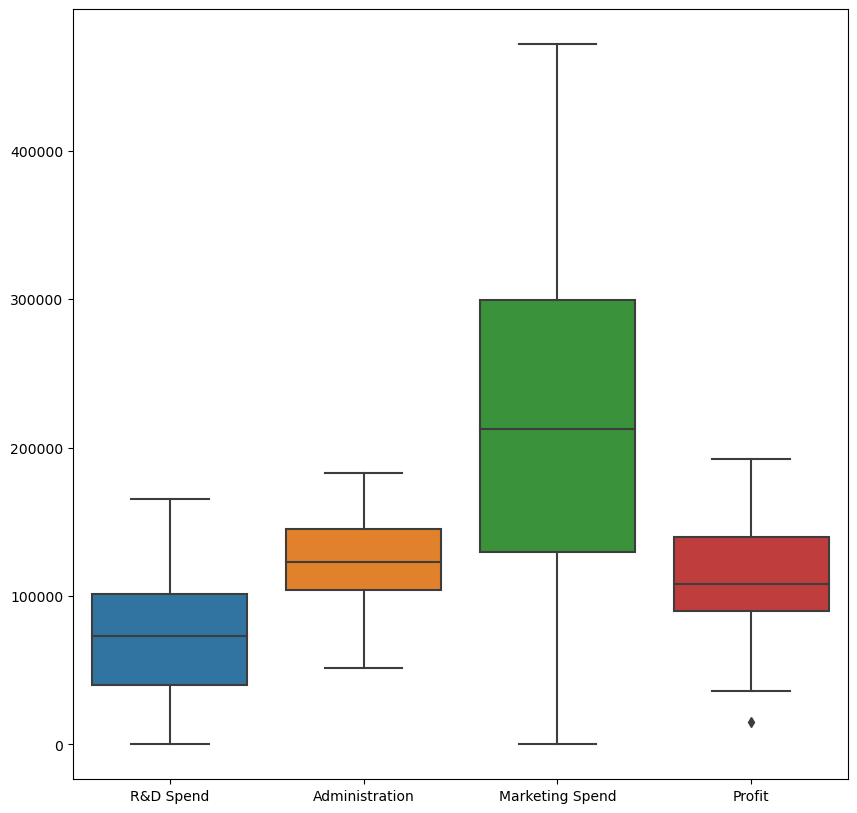

In [60]:
plt.figure(figsize=(10,10))
sns.boxplot(data=startupsdf)

In [61]:
#removing outliers
iqr = startupsdf['Profit'].quantile(0.75) - startupsdf['Profit'].quantile(0.25)
upper_limit = startupsdf['Profit'].quantile(0.75) + 1.5 * iqr
lower_limit = startupsdf['Profit'].quantile(0.25) - 1.5 * iqr

In [62]:
outliers = []
profit = startupsdf['Profit']

for i in profit:
    if i > upper_limit:
        outliers.append(i)

for i in profit:
    if i < lower_limit:
        outliers.append(i)


In [63]:
startupsdf['Profit'] = startupsdf['Profit'].replace(outliers, startupsdf['Profit'].mean())

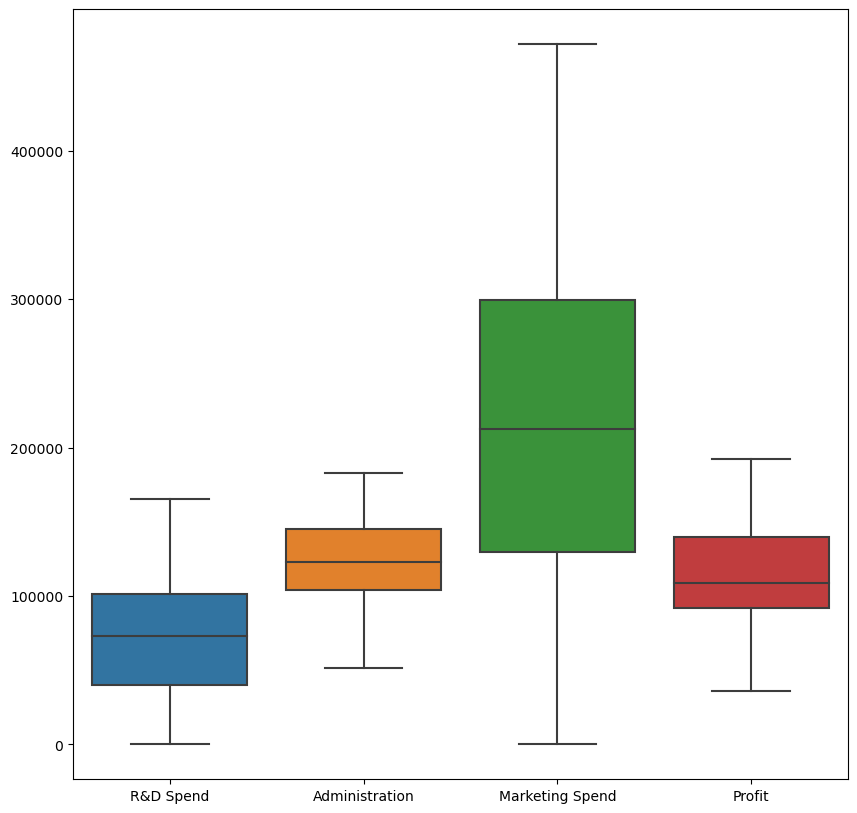

In [64]:
plt.figure(figsize=(10,10))
sns.boxplot(data=startupsdf)
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_15100\2446034411.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(startupsdf['Profit'])


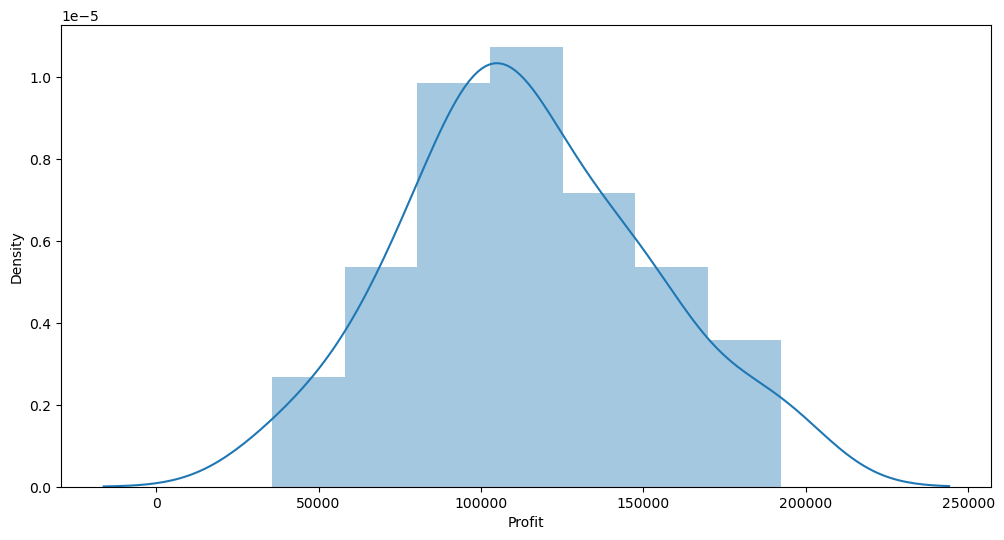

In [65]:
plt.figure(figsize=(12,6))
sns.distplot(startupsdf['Profit'])
plt.show()

## One hot encoding the data

In [66]:
#One-hot encoding the states
startupsdf = OneHotEncoder().fit_transform(startupsdf,fit_params=['State'])

In [67]:
startupsdf

,R&D Spend,Administration,Marketing Spend,State_1,State_2,State_3,Profit
0,165349.20,136897.80,471784.10,1,0,0,192261.8300
1,162597.70,151377.59,443898.53,0,1,0,191792.0600
2,153441.51,101145.55,407934.54,0,0,1,191050.3900
3,144372.41,118671.85,383199.62,1,0,0,182901.9900
4,142107.34,91391.77,366168.42,0,0,1,166187.9400
5,131876.90,99814.71,362861.36,1,0,0,156991.1200
6,134615.46,147198.87,127716.82,0,1,0,156122.5100
7,130298.13,145530.06,323876.68,0,0,1,155752.6000
8,120542.52,148718.95,311613.29,1,0,0,152211.7700
9,123334.88,108679.17,304981.62,0,1,0,149759.9600


In [68]:
features = startupsdf.drop(['Profit'], axis=1)
target = startupsdf['Profit']

In [69]:
target.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

In [70]:
features.head()

,R&D Spend,Administration,Marketing Spend,State_1,State_2,State_3
0,165349.20,136897.80,471784.10,1,0,0
1,162597.70,151377.59,443898.53,0,1,0
2,153441.51,101145.55,407934.54,0,0,1
3,144372.41,118671.85,383199.62,1,0,0
4,142107.34,91391.77,366168.42,0,0,1


In [71]:
#Feature Selection 
data=f_regression(features[['R&D Spend','Administration','Marketing Spend']],target)
f_df=pd.DataFrame(data,index=[['F_statistic','p_value']],columns=features[['R&D Spend','Administration','Marketing Spend']].columns).T
f_df

,F_statistic,p_value
R&D Spend,480.336532,1.198976e-26
Administration,2.126120,1.513194e-01
Marketing Spend,53.635119,2.350323e-09


In [72]:
features = features.drop(columns='Administration')

# Spliting Train and test data 

In [73]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

## Scaling

In [76]:
#feature Scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test )


# Regression Models

In [77]:
lr = LinearRegression()
lr.fit(x_train,y_train)
print(f"Training Accuracy Score :{lr.score(x_train, y_train) * 100:.1f}%")
print(f"Validation Accuracy Score :{lr.score(x_test, y_test) * 100:.1f}%")


Training Accuracy Score :90.7%
Validation Accuracy Score :94.1%


In [81]:
dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)
print(f"Training Accuracy Score :{dt.score(x_train, y_train) * 100:.2f}%")
print(f"Validation Accuracy Score :{dt.score(x_test, y_test) * 100:.2f}%")

Training Accuracy Score :100.00%
Validation Accuracy Score :94.53%


In [82]:
rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=1)
rf.fit(x_train,y_train)
print(f"Training Accuracy Score :{rf.score(x_train, y_train) * 100:.2f}%")
print(f"Validation Accuracy Score :{rf.score(x_test, y_test) * 100:.2f}%")

Training Accuracy Score :97.74%
Validation Accuracy Score :97.52%


In [83]:
y_prediction = rf.predict(x_test)
print(y_prediction)

[102982.06559035 135271.67309476 135885.0618056   80347.03149909
 185532.6905     111672.03722786  74499.40462364  99639.72459102
 110013.36472786 165718.2723    ]


In [84]:
df = pd.DataFrame(
    data={"Predicted Values:": y_prediction, "actual Values": y_test})
df


,Predicted Values:,actual Values
28,102982.065590,103282.38
11,135271.673095,144259.40
10,135885.061806,146121.95
41,80347.031499,77798.83
2,185532.690500,191050.39
27,111672.037228,105008.31
38,74499.404624,81229.06
31,99639.724591,97483.56
22,110013.364728,110352.25
4,165718.272300,166187.94


In [85]:
r2_score(y_test, y_prediction)

0.9751910449070015

In [87]:
mean_err = mean_squared_error(y_test, y_prediction)
print(f"Mean squared error for the model is: {mean_err*100:.2f}%")

Mean squared error for the model is: 3172796409.96%


In [88]:
rmse = np.sqrt(mean_err)
print(f"Root mean squared error for the model is: {rmse*100:.2f}%")

Root mean squared error for the model is: 563275.81%


In [89]:
mae = mean_absolute_error(y_test, y_prediction)
print(f"Mean absolute error for the model is: {mae}")

Mean absolute error for the model is: 4394.893067575926


# Results

In this instance it is found that in a testing enviroment the training accuracy of a decision tree regressor was the best out of the used regression methods, however the was a close to 5% diffrence between the testing accuracy and training accuracy which was te second highest between te models

The Random forest Regressor model was ultimately chosen due to its high training and testing accuracy which have a less tha 1% diffrence between them. It also has a low mean squared error as well as a 97.44% coefficient of determination
